# Impact of Gender, Type of Travel, Customer Type and Class on Satisfaction & Airline Passenger Response Prediction

### Data Set:
For my final project I have selected Airline Passenger Satisfaction data that is publicly available on Kaggle https://www.kaggle.com/teejmahal20/airline-passenger-satisfaction.

### Data Exploration:
In this data I have found Customer type, Type of travel, Class and Flight distance which can be helpful to measure the psychology of customer and some features like Inflight Wifi Service, Departure/Arrival Time Convenient, Gate location, Food and Drink, Seat Comfort, Leg Room Service, Cleanliness, Arrival Delay in Time etc., on behalf of which we should use machine learning model (Classification)  to predict what will be the response from the customers either satisfactory, dissatisfactory or neutral.

### Research Question:
What are the factors in a flight that impact passengers that either they are satisfied/dissatisfied from the Airline services? I want to predict the response of passengers by using Classification.


Fist of all import all the necessary libraries. 

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns

Now open the data upon which we are working. We have data divided data into two parts already that is train data and test data.

In [28]:
test=pd.read_csv("test.csv")
train=pd.read_csv("train.csv")

In [29]:
test.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [30]:
train.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [31]:
print(test.shape)
print(train.shape)

(25976, 25)
(103904, 25)


First we will drop all the null values from our data if any null values exist and then we will check the correlation of features with the response.

Furthr our classsification is irrespective of Customer type, Gender, Age, Class and Type of Travel therefore we are deleting all unnecessary columns also. 

In [32]:
test_before=test.shape[0]
train_before=train.shape[0]
print(test_before)
print(train_before)

25976
103904


In [33]:
test=test.dropna()
train=train.dropna()

In [34]:
test_after=test.shape[0]
train_after=train.shape[0]
print(test_after)
print(train_after)

25893
103594


In [35]:
print(test.columns)
print(train.columns)

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')
Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'D

# Impact of Gender, Type of Travel, Customer Type and Class on Satisfaction

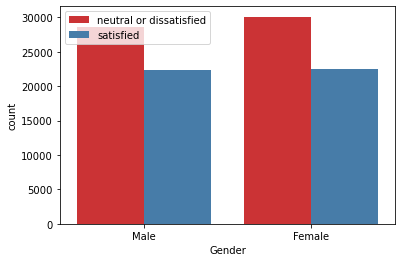

In [36]:
plt.figure()
sns.countplot(x="Gender",hue="satisfaction",data=train,palette="Set1")
plt.legend(loc="upper left")
plt.show()

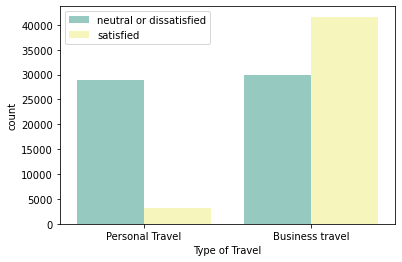

In [37]:
plt.figure()
sns.countplot(x="Type of Travel",hue="satisfaction",data=train,palette="Set3")
plt.legend(loc="upper left")
plt.show()

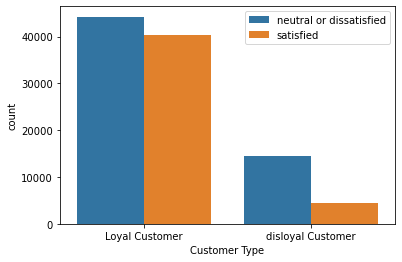

In [38]:
plt.figure()
sns.countplot(x="Customer Type",hue="satisfaction",data=train)
plt.legend(loc="upper right")
plt.show()

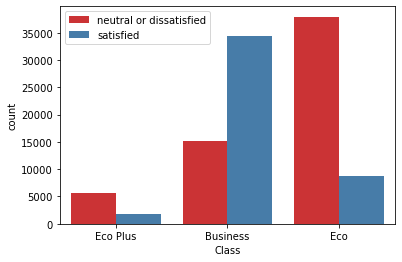

In [39]:
plt.figure()
sns.countplot(x="Class",hue="satisfaction",data=train,palette="Set1")
plt.legend(loc="upper left")
plt.show()

# Preparing Data for Classification

In [40]:
del test["Unnamed: 0"]
del test["id"]
del test["Gender"]
del test["Age"]
del test["Type of Travel"]
del test["Customer Type"]
del test["Class"]

In [41]:
test.head()

,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,160,5,4,3,4,3,4,3,5,5,5,5,2,5,5,50,44.0,satisfied
1,2863,1,1,3,1,5,4,5,4,4,4,4,3,4,5,0,0.0,satisfied
2,192,2,0,2,4,2,2,2,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3377,0,0,0,2,3,4,4,1,1,1,1,3,1,4,0,6.0,satisfied
4,1182,2,3,4,3,4,1,2,2,2,2,2,4,2,4,0,20.0,satisfied


In [42]:
del train["Unnamed: 0"]
del train["id"]
del train["Gender"]
del train["Age"]
del train["Type of Travel"]
del train["Customer Type"]
del train["Class"]

In [43]:
train.head()

,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


Here We are assigning values in a new column named label as satisfie=1 and neutral or dissatisfied=0

In [44]:
train.loc[train["satisfaction"] == ("neutral or dissatisfied"), ["satisfaction"]] = 0

In [45]:
train.loc[train["satisfaction"] == ("satisfied"), ["satisfaction"]] = 1

In [46]:
train.satisfaction.unique()

array([0, 1], dtype=object)

In [47]:
train.head()

,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,0
1,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,0
2,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,1
3,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,0
4,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,1


In [48]:
test.loc[test["satisfaction"] == ("neutral or dissatisfied"), ["satisfaction"]] = 0

In [49]:
test.loc[test["satisfaction"] == ("satisfied"), ["satisfaction"]] = 1

In [50]:
test.head()

,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,160,5,4,3,4,3,4,3,5,5,5,5,2,5,5,50,44.0,1
1,2863,1,1,3,1,5,4,5,4,4,4,4,3,4,5,0,0.0,1
2,192,2,0,2,4,2,2,2,2,4,1,3,2,2,2,0,0.0,0
3,3377,0,0,0,2,3,4,4,1,1,1,1,3,1,4,0,6.0,1
4,1182,2,3,4,3,4,1,2,2,2,2,2,4,2,4,0,20.0,1


In [51]:
test.satisfaction.unique()

array([1, 0], dtype=object)

In [52]:
test.isnull().any()

Flight Distance                      False
Inflight wifi service                False
Departure/Arrival time convenient    False
Ease of Online booking               False
Gate location                        False
Food and drink                       False
Online boarding                      False
Seat comfort                         False
Inflight entertainment               False
On-board service                     False
Leg room service                     False
Baggage handling                     False
Checkin service                      False
Inflight service                     False
Cleanliness                          False
Departure Delay in Minutes           False
Arrival Delay in Minutes             False
satisfaction                         False
dtype: bool

In [53]:
train["label"]=train["satisfaction"].astype(int)
test["label"]=train["satisfaction"].astype(int)

In [54]:
del train["satisfaction"]
del test["satisfaction"]

In [55]:
train.head(3)

,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,label
0,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,0
1,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,0
2,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,1


In [56]:
test.head(3)

,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,label
0,160,5,4,3,4,3,4,3,5,5,5,5,2,5,5,50,44.0,0.0
1,2863,1,1,3,1,5,4,5,4,4,4,4,3,4,5,0,0.0,0.0
2,192,2,0,2,4,2,2,2,2,4,1,3,2,2,2,0,0.0,1.0


In [57]:
test.isnull().any()

Flight Distance                      False
Inflight wifi service                False
Departure/Arrival time convenient    False
Ease of Online booking               False
Gate location                        False
Food and drink                       False
Online boarding                      False
Seat comfort                         False
Inflight entertainment               False
On-board service                     False
Leg room service                     False
Baggage handling                     False
Checkin service                      False
Inflight service                     False
Cleanliness                          False
Departure Delay in Minutes           False
Arrival Delay in Minutes             False
label                                 True
dtype: bool

In [58]:
test.dropna(inplace=True)

In [59]:
test.head()

,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,label
0,160,5,4,3,4,3,4,3,5,5,5,5,2,5,5,50,44.0,0.0
1,2863,1,1,3,1,5,4,5,4,4,4,4,3,4,5,0,0.0,0.0
2,192,2,0,2,4,2,2,2,2,4,1,3,2,2,2,0,0.0,1.0
3,3377,0,0,0,2,3,4,4,1,1,1,1,3,1,4,0,6.0,0.0
4,1182,2,3,4,3,4,1,2,2,2,2,2,4,2,4,0,20.0,1.0


In [60]:
test.isnull().any()

Flight Distance                      False
Inflight wifi service                False
Departure/Arrival time convenient    False
Ease of Online booking               False
Gate location                        False
Food and drink                       False
Online boarding                      False
Seat comfort                         False
Inflight entertainment               False
On-board service                     False
Leg room service                     False
Baggage handling                     False
Checkin service                      False
Inflight service                     False
Cleanliness                          False
Departure Delay in Minutes           False
Arrival Delay in Minutes             False
label                                False
dtype: bool

Next we will train our model by using train data.

# Applying Classification

In [61]:
y_train=train.label
X_train=train.drop("label",axis=1)
y_test=test.label
X_test=test.drop("label",axis=1)

In [62]:
y_test=y_test.astype(int)



In [63]:
y_test.head()



0    0
1    0
2    1
3    0
4    1
Name: label, dtype: int32

In [64]:
y_train.head()

0    0
1    0
2    1
3    0
4    1
Name: label, dtype: int32

In [65]:
response = DecisionTreeClassifier(max_leaf_nodes=18, random_state=0)
response.fit(X_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=18, random_state=0)

In [66]:
response_prediction=response.predict(X_test)

In [67]:
response_prediction[:10]

array([1, 1, 0, 1, 0, 1, 1, 1, 1, 1])

In [68]:
y_test.head(10)

0    0
1    0
2    1
3    0
4    1
5    0
6    0
7    1
8    0
9    0
Name: label, dtype: int32

In [69]:
accuracy_score(y_true = y_test, y_pred = response_prediction)

0.5076071387093027